In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("stroke_data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# STEP 1) Initial Data Inspection:
df.shape

(5110, 12)

In [5]:
# STEP 2)checking for duplicate entries in dataframe considering all columns
duplicate_row = df[df.duplicated()]
len(duplicate_row)

0

In [6]:
#Step 3) Checking missing values
missing_values = df.isnull()
missing_values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Total number of missing values per column
missing_values = df.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#Step 4) inspecting datatypes of columns of the dataframe
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
#Step 5) finding mean of all columns
df.mean()

C:\Users\Yash\AppData\Local\Temp\ipykernel_4344\3266797697.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [10]:
# Step 6) Getting unique values from each columns
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


In [11]:
#cleaning irrelevant data.
df[df['gender'] == 'Other'] #here i found a row which has gender other, it doesn't seems to be beneficial.
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

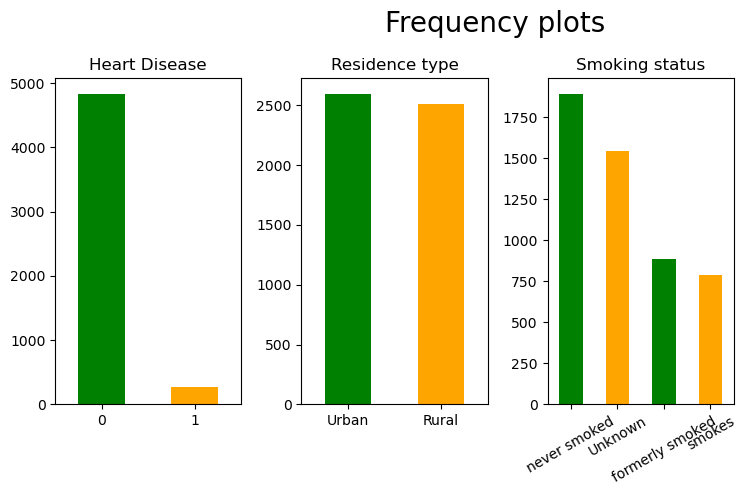

In [12]:
# Step 7) Plotting a frequency plot which is used to get frequency of unique values of column.

fig = plt.figure(figsize=(10, 5))
fig.suptitle("Frequency plots", fontsize=20)

ax1 = fig.add_subplot(141)
ax1.set_title("Heart Disease")
df['heart_disease'].value_counts().plot(kind='bar', ax=ax1, color = ['green','orange'])
ax1.tick_params(axis='x', rotation=0)

ax2 = fig.add_subplot(142)
ax2.set_title("Residence type")
df['Residence_type'].value_counts().plot(kind='bar', ax=ax2, color = ['green','orange'])
ax2.tick_params(axis='x', rotation=0)

ax3 = fig.add_subplot(143)
ax3.set_title("Smoking status")
df['smoking_status'].value_counts().plot(kind='bar', ax=ax3, color = ['green','orange'])
ax3.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


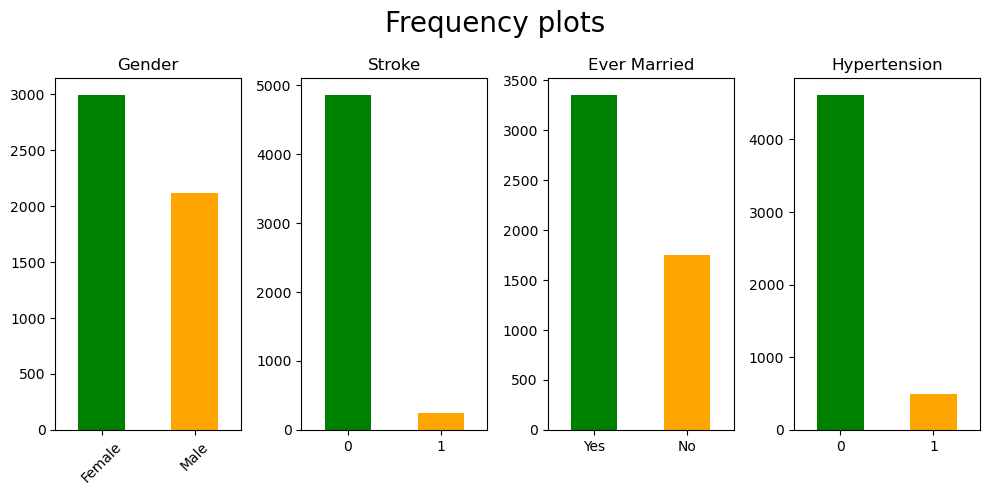

In [13]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Frequency plots", fontsize=20)

ax1 = fig.add_subplot(141)
ax1.set_title("Gender")
df['gender'].value_counts().plot(kind='bar', ax=ax1, color = ['green','orange'])
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(142)
ax2.set_title("Stroke")
df['stroke'].value_counts().plot(kind='bar', ax=ax2, color = ['green','orange'])
ax2.tick_params(axis='x', rotation=0)

ax3 = fig.add_subplot(143)
ax3.set_title("Ever Married")
df['ever_married'].value_counts().plot(kind='bar', ax=ax3, color = ['green','orange'])
ax3.tick_params(axis='x', rotation=0)

ax4 = fig.add_subplot(144)
ax4.set_title("Hypertension")
df['hypertension'].value_counts().plot(kind='bar', ax=ax4, color = ['green','orange'])
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='work_type', ylabel='count'>

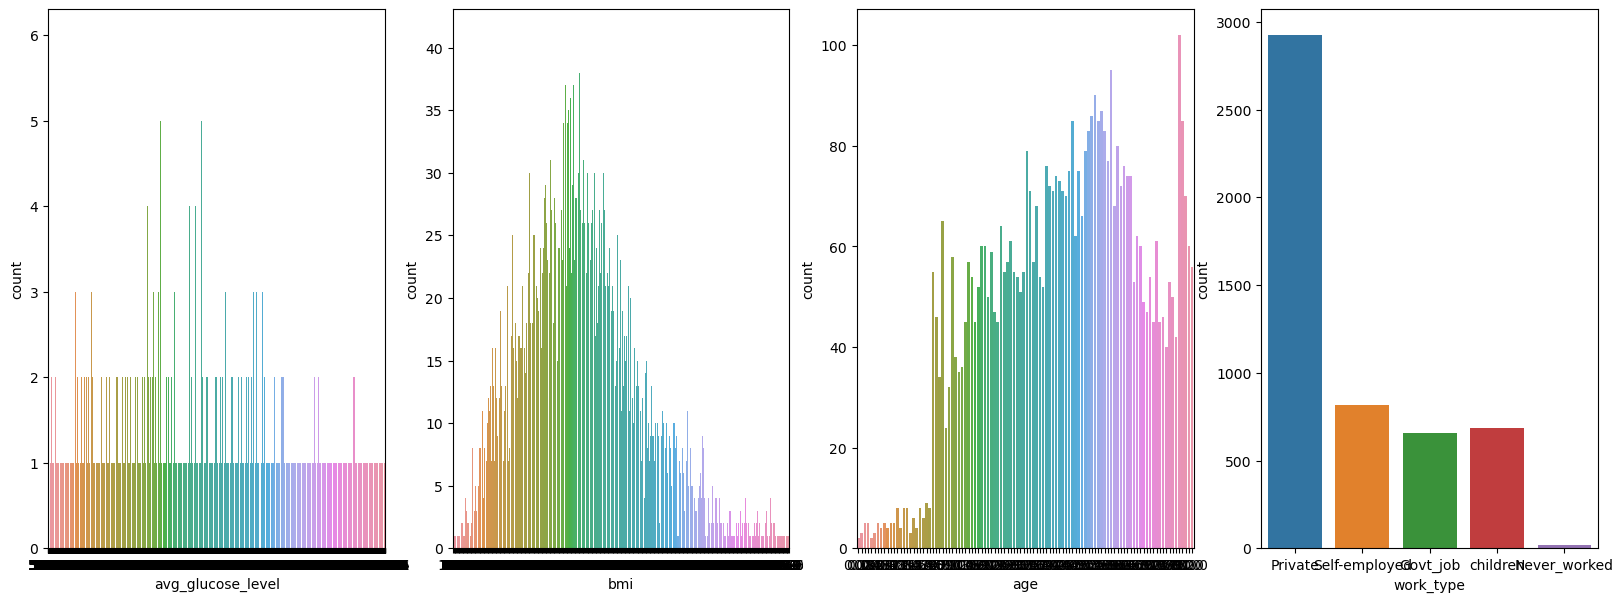

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,7))
sns.countplot(x="avg_glucose_level", data=df,ax=ax1)
sns.countplot(x="bmi", data=df,ax=ax2)
sns.countplot(x="age", data=df,ax=ax3)
sns.countplot(x="work_type", data=df,ax=ax4)

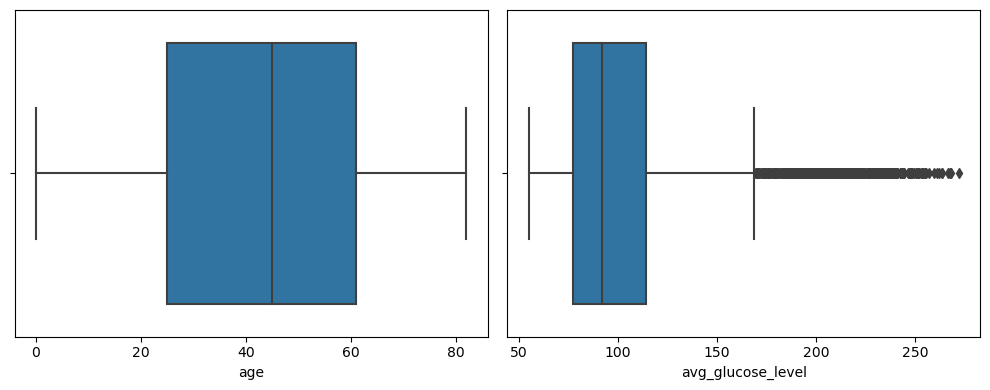

In [15]:
# Step 8) plotting box plot for below list to see outliers
box_plt_list = ['age','avg_glucose_level']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes = axes.flatten()
for i, col in enumerate(box_plt_list):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()


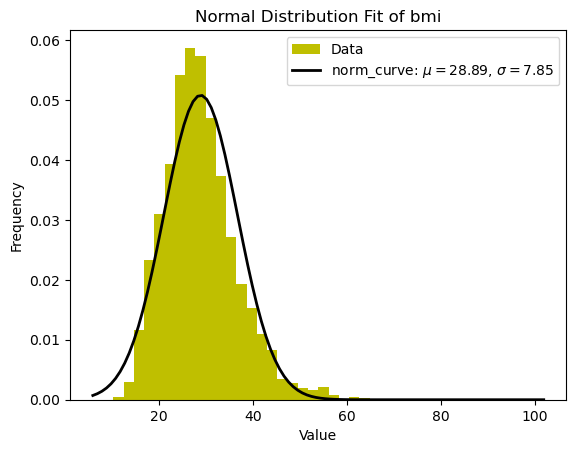

In [16]:
#Step 9) Normal distribution curve of bmi

filtered_df = df[df['bmi'].notnull()] # filtering none values from dataframe
filtered_df
mu, std = norm.fit(filtered_df['bmi'])
plt.hist(filtered_df['bmi'], bins=40, density=True, color='y',label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='norm_curve: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, std))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Fit of bmi')
plt.legend()
plt.show()

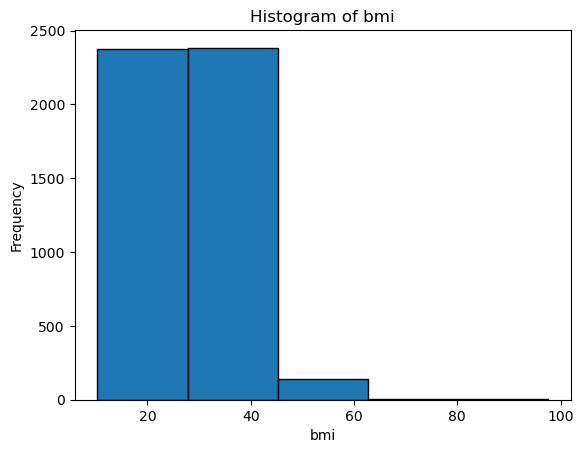

In [17]:
#plotting histogram of bmi column
plt.hist(df['bmi'], bins=5, edgecolor='k')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

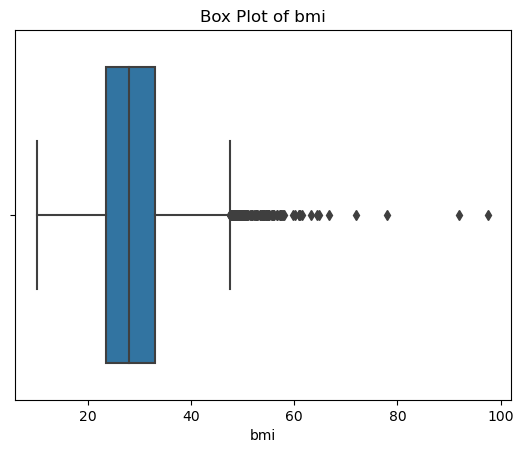

In [18]:
# Create a box plot for the bmi
sns.boxplot(x=filtered_df['bmi'])
plt.xlabel('bmi')
plt.title('Box Plot of bmi')
plt.show()

In [19]:
# checking skewness of bmi column
skewness = skew(filtered_df['bmi'])
skewness

1.0547404696625051

In [20]:
#Step 10) Trimming mean
trim_percentage = 10           
trimmed_mean_bmi = stats.trim_mean(filtered_df['bmi'], proportiontocut=trim_percentage/100)
print("trimmed mean of bmi :",trimmed_mean_bmi)

trimmed mean of bmi : 28.34422097759674


In [21]:
# Step 11) Imputing mean with the help of trimmed mean

# Performing above analysis for imputation of null values in bmi column
# In conclusion, I feel replacing with trimmed mean will be a reasonable approach.
df['bmi'].fillna(trimmed_mean_bmi,inplace = True)

In [22]:
#verifiying are null values replaced with trimmed mean or not
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

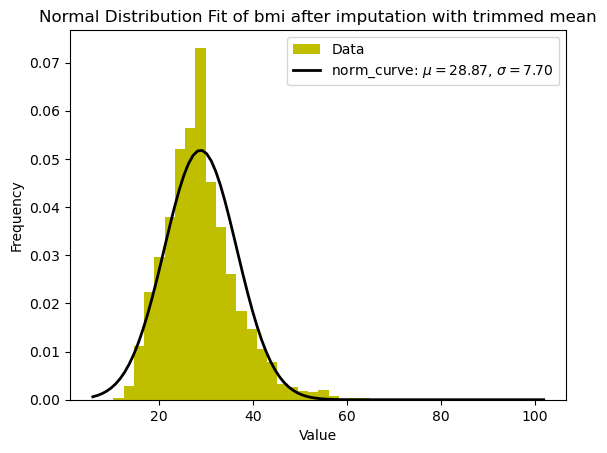

In [23]:
# Step 12) Verifying probablity distribution curve after imputing bmi values using trimmed mean
mu, std = norm.fit(df['bmi'])
plt.hist(df['bmi'], bins=40, density=True, color='y',label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='norm_curve: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, std))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Fit of bmi after imputation with trimmed mean')
plt.legend()
plt.show()

In [24]:
less_than_18 = df[df['age']<18]
less_than_18

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.344221,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.000000,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.800000,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.300000,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0


In [25]:
#Step 13) Data Transformation

df['age'] = np.ceil(df['age']).astype(int)

In [26]:
df['bmi'] = np.round(df['bmi'],2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   int32  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 498.9+ KB


In [28]:
#Step 14) Logical data check 
#checking wheather work_type = children having age greater than 18
children_df = df[df['work_type'] == 'children']
result = children_df[['age', 'work_type']]
age_gt_18 = list(result['age']>18)
print("Do we have any entry where work type is children and age greater than 18:",all(age_gt_18))

Do we have any entry where work type is children and age greater than 18: False


In [29]:
# Analysing the records of never_worked work_type, because it seems that most of its records should belong to work_type children.
# Here we can say that never_worked work_type is a set of persons whose age is almost similar to the age of children.
# Moreover, All those persons have smoking habit either never smoked or Unknown.

df[df['work_type'] == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,61408,Male,23,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,13948,Female,19,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,16556,Male,13,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,56986,Male,17,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,41870,Male,17,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,13862,Female,13,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,51935,Male,16,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,61219,Female,14,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,23508,Female,17,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


In [30]:
#Step 15) Grouping by worktype and taking out average of bmi and average
averages_worktype = df.groupby('work_type')[['bmi', 'avg_glucose_level']].mean().reset_index()
averages_worktype

,work_type,bmi,avg_glucose_level
0,Govt_job,30.432390,107.779772
1,Never_worked,25.545455,96.042727
2,Private,30.230732,106.784350
3,Self-employed,30.111306,112.645446
4,children,20.231354,94.400277


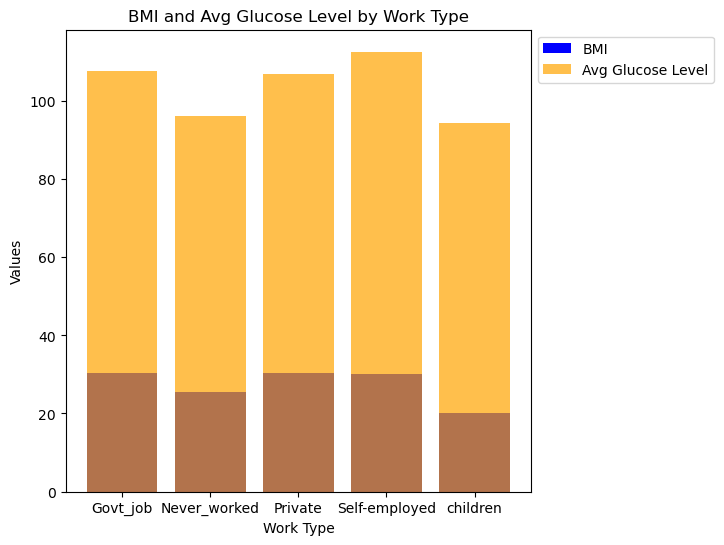

In [31]:
# Plotting above analysis
plt.figure(figsize=(6 ,6))
plt.bar(averages_worktype['work_type'], averages_worktype['bmi'], label='BMI', color='blue')
plt.bar(averages_worktype['work_type'], averages_worktype['avg_glucose_level'], label='Avg Glucose Level', color='orange', alpha=0.7)
plt.xlabel('Work Type')
plt.ylabel('Values')
plt.title('BMI and Avg Glucose Level by Work Type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks()
plt.show()


In [32]:
# Step 16) Groupped the averages based on stroke
# Here we are trying to show average values of the BMI and AVG_GLUCOSE_LEVEL of the person who suffered stroke and who doesn't
averages_stroke = df.groupby('stroke')[['bmi', 'avg_glucose_level']].mean().reset_index()
averages_stroke

# Based on analysis we are trying to convey the rough estimates of the person who suffered stroke and who doesn't. 

,stroke,bmi,avg_glucose_level
0,0,28.808383,104.787584
1,1,30.128916,132.544739


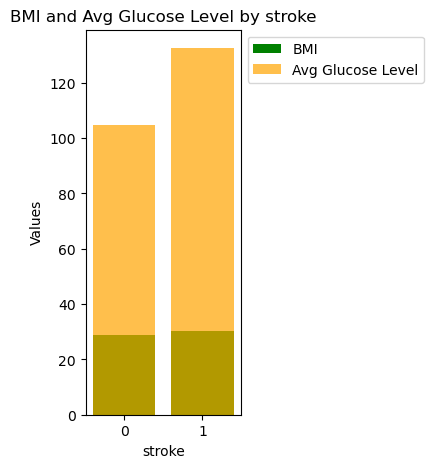

In [33]:
#Plotting Average values of BMI and Avg Glucose Level by stroke
plt.figure(figsize=(2, 5))
plt.bar(averages_stroke['stroke'], averages_stroke['bmi'], label='BMI', color='green')
plt.bar(averages_stroke['stroke'], averages_stroke['avg_glucose_level'], label='Avg Glucose Level', color='orange', alpha=0.7)
plt.xlabel('stroke')
plt.ylabel('Values')
plt.title('BMI and Avg Glucose Level by stroke')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks()
plt.show()

In [34]:
# Step 17) Based on work type which work type professionals are at higher risk of getting stroke
risk_of_stroke = df.groupby('work_type')['stroke'].mean() * 100
work_type_df = pd.DataFrame({'work_type': risk_of_stroke.index, 'risk of stroke': risk_of_stroke.values})
work_type_df

,work_type,risk of stroke
0,Govt_job,5.022831
1,Never_worked,0.000000
2,Private,5.095759
3,Self-employed,7.936508
4,children,0.291121


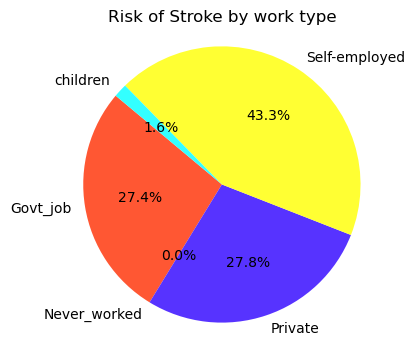

In [35]:
ever_married = work_type_df['work_type']
risk_of_stroke = work_type_df['risk of stroke']
plt.figure(figsize=(4, 4))
plt.pie(risk_of_stroke, labels=ever_married, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF'])
plt.title('Risk of Stroke by work type')
plt.axis('equal') 
plt.show()

In [36]:
# Based on smoking habit of people which smokers falls at higher risk  of stroke
risk_of_stroke = df.groupby('smoking_status')['stroke'].mean() * 100
smoke_status_df = pd.DataFrame({'smoking_status': risk_of_stroke.index, 'risk of stroke': risk_of_stroke.values})
smoke_status_df

,smoking_status,risk of stroke
0,Unknown,3.044041
1,formerly smoked,7.918552
2,never smoked,4.756871
3,smokes,5.323194


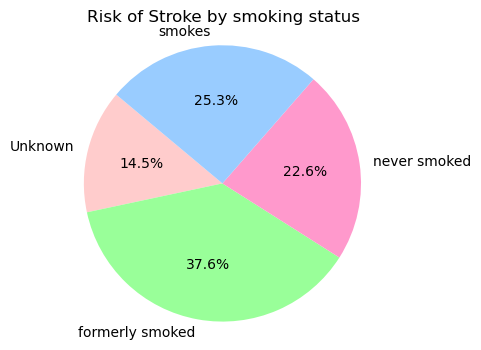

In [37]:
ever_married = smoke_status_df['smoking_status']
risk_of_stroke = smoke_status_df['risk of stroke']
plt.figure(figsize=(4, 4))
plt.pie(risk_of_stroke, labels=ever_married, autopct='%1.1f%%', startangle=140, colors = ['#FFCCCC', '#99FF99', '#FF99CC', '#99CCFF'])
plt.title('Risk of Stroke by smoking status')
plt.axis('equal')
plt.show()

In [38]:
# Based on maritial status who falls at higher risk of getting stroke
risk_of_stroke = df.groupby('ever_married')['stroke'].mean() * 100
marriage_status_df = pd.DataFrame({'ever_married': risk_of_stroke.index, 'risk of stroke': risk_of_stroke.values})
marriage_status_df

,ever_married,risk of stroke
0,No,1.651481
1,Yes,6.561288


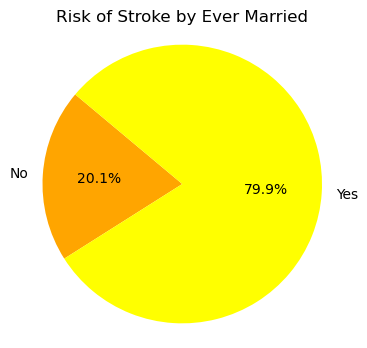

In [39]:
#Pie chart for maritial status who falls at higher risk of getting stroke
ever_married = marriage_status_df['ever_married']
risk_of_stroke = marriage_status_df['risk of stroke']
plt.figure(figsize=(4, 4))
plt.pie(risk_of_stroke, labels=ever_married, autopct='%1.1f%%', startangle=140, colors = ['orange', 'yellow'])
plt.title('Risk of Stroke by Ever Married')
plt.axis('equal')
plt.show()

In [40]:
# Step 18) Converting Columns with binary outputs into 0 and 1
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']) # Male : 1, Female : 0
df['ever_married'] = le.fit_transform(df['ever_married']) # Yes : 1, No : 0
df['Residence_type'] = le.fit_transform(df['Residence_type']) # Urban : 1, Rural : 0
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,Private,1,228.69,36.60,formerly smoked,1
1,51676,0,61,0,0,1,Self-employed,0,202.21,28.34,never smoked,1
2,31112,1,80,0,1,1,Private,0,105.92,32.50,never smoked,1
3,60182,0,49,0,0,1,Private,1,171.23,34.40,smokes,1
4,1665,0,79,1,0,1,Self-employed,0,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,Private,1,83.75,28.34,never smoked,0
5106,44873,0,81,0,0,1,Self-employed,1,125.20,40.00,never smoked,0
5107,19723,0,35,0,0,1,Self-employed,0,82.99,30.60,never smoked,0
5108,37544,1,51,0,0,1,Private,0,166.29,25.60,formerly smoked,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int32  
 2   age                5109 non-null   int32  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int32  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   int32  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(2), int32(4), int64(4), object(2)
memory usage: 439.1+ KB


In [42]:
# Step 19) Converting work_type into dummies
dummy_columns = pd.get_dummies(df['work_type'])

df = pd.concat([df, dummy_columns], axis=1)

df.drop('work_type', axis=1, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,9046,1,67,0,1,1,1,228.69,36.60,formerly smoked,1,0,0,1,0,0
1,51676,0,61,0,0,1,0,202.21,28.34,never smoked,1,0,0,0,1,0
2,31112,1,80,0,1,1,0,105.92,32.50,never smoked,1,0,0,1,0,0
3,60182,0,49,0,0,1,1,171.23,34.40,smokes,1,0,0,1,0,0
4,1665,0,79,1,0,1,0,174.12,24.00,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,1,83.75,28.34,never smoked,0,0,0,1,0,0
5106,44873,0,81,0,0,1,1,125.20,40.00,never smoked,0,0,0,0,1,0
5107,19723,0,35,0,0,1,0,82.99,30.60,never smoked,0,0,0,0,1,0
5108,37544,1,51,0,0,1,0,166.29,25.60,formerly smoked,0,0,0,1,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int32  
 2   age                5109 non-null   int32  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
 11  Govt_job           5109 non-null   uint8  
 12  Never_worked       5109 non-null   uint8  
 13  Private            5109 non-null   uint8  
 14  Self-employed      5109 non-null   uint8  
 15  children           5109 non-null   uint8  
dtypes: float64(2), int32(4),

In [44]:
# Step 20) Ranking the ordinal data of smoking_status column
df['smoking_status'] = df['smoking_status'].map({'never smoked' : 0, 'Unknown' : 1, 'formerly smoked' : 2, 'smokes' : 3})
df['smoking_status'] = df['smoking_status'].astype(int)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,9046,1,67,0,1,1,1,228.69,36.60,2,1,0,0,1,0,0
1,51676,0,61,0,0,1,0,202.21,28.34,0,1,0,0,0,1,0
2,31112,1,80,0,1,1,0,105.92,32.50,0,1,0,0,1,0,0
3,60182,0,49,0,0,1,1,171.23,34.40,3,1,0,0,1,0,0
4,1665,0,79,1,0,1,0,174.12,24.00,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,1,83.75,28.34,0,0,0,0,1,0,0
5106,44873,0,81,0,0,1,1,125.20,40.00,0,0,0,0,0,1,0
5107,19723,0,35,0,0,1,0,82.99,30.60,0,0,0,0,0,1,0
5108,37544,1,51,0,0,1,0,166.29,25.60,2,0,0,0,1,0,0


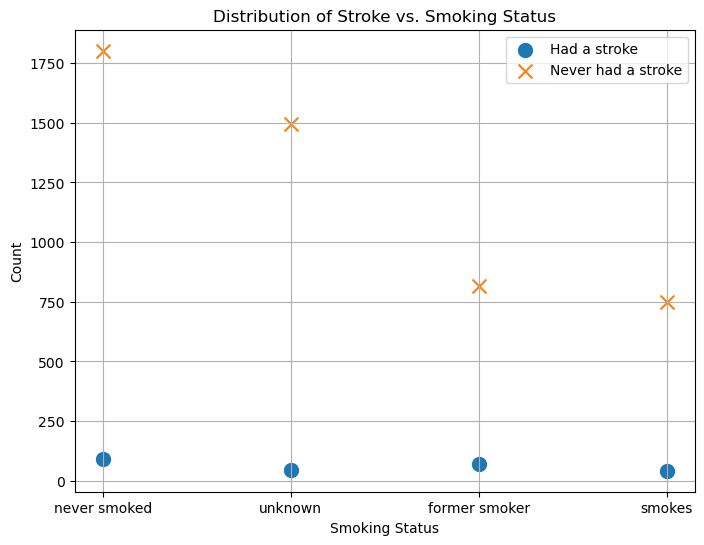

In [45]:
# Step 21) How your smoking habits affects the probablity of having the strokes.
counts = df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
plt.scatter(counts.index, counts[1], label='Had a stroke', marker='o', s=100)
plt.scatter(counts.index, counts[0], label='Never had a stroke', marker='x', s=100)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(counts.index, labels=['never smoked', 'unknown', 'former smoker', 'smokes'])  # Assuming '0', '1', '2', '3' are the categories
plt.legend()
plt.title('Distribution of Stroke vs. Smoking Status')
plt.grid()

In [46]:
# Step 22) Rearranging Columns
columns_moved = [df.pop(col) for col in ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']]
for col in columns_moved[::-1]:
    df.insert(7, col.name, col)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,1,0,0,1,0,0,228.69,36.60,2,1
1,51676,0,61,0,0,1,0,0,0,0,1,0,202.21,28.34,0,1
2,31112,1,80,0,1,1,0,0,0,1,0,0,105.92,32.50,0,1
3,60182,0,49,0,0,1,1,0,0,1,0,0,171.23,34.40,3,1
4,1665,0,79,1,0,1,0,0,0,0,1,0,174.12,24.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,1,0,0,1,0,0,83.75,28.34,0,0
5106,44873,0,81,0,0,1,1,0,0,0,1,0,125.20,40.00,0,0
5107,19723,0,35,0,0,1,0,0,0,0,1,0,82.99,30.60,0,0
5108,37544,1,51,0,0,1,0,0,0,1,0,0,166.29,25.60,2,0
